# Imports

In [1]:
!pip install statsmodels==0.13.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!wget https://www.dropbox.com/s/v8lvawzau8qj32f/df_contr.csv?dl=0 -O df_contr.csv

--2022-06-24 21:28:58--  https://www.dropbox.com/s/v8lvawzau8qj32f/df_contr.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/v8lvawzau8qj32f/df_contr.csv [following]
--2022-06-24 21:28:59--  https://www.dropbox.com/s/raw/v8lvawzau8qj32f/df_contr.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1af528b019872039b7b7d9873d.dl.dropboxusercontent.com/cd/0/inline/Bn3b4Kukw-kAVuacTsPegHDpeY5qjjVpeB_iOLh8lb4W74CkxLeEOq1j6zec2IJP0wyCm7doIk7hO8Cv5nGnyhrIMd0bqOptP0EbKf2geg0NtZXTp-dJwPComy-fJ--7DMYazVd2CqUONyUFZaxotxRc1VMu_LnHHIYON_8_3B4t2A/file# [following]
--2022-06-24 21:28:59--  https://uc1af528b019872039b7b7d9873d.dl.dropboxusercontent.com/cd/0/inline/Bn3b4Kukw-kAVuacTsPegHDpeY5qjjVpeB_iOLh8lb4W74CkxLeEOq1j6zec2IJ

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sn

# Get data

In [4]:
data = pd.read_csv('/content/df_contr.csv', index_col=0, sep=',', parse_dates=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.0,1.127401e-06,0.0,0.007430,0.796027,0.0,0.0,0.001325,0.101094,0.000460,...,0.613967,4.091510e-01,0.000000,0.526460,0.041600,0.659023,0.551674,0.580888,0.399540,0.667056
1,0.0,2.441844e-06,0.0,0.001321,0.793136,0.0,0.0,0.001277,0.095537,0.000491,...,0.569403,2.914488e-01,0.000000,0.522974,0.022780,0.657298,0.549259,0.556894,0.384349,0.655138
2,0.0,8.258066e-06,0.0,0.021003,0.787729,0.0,0.0,0.001436,0.082391,0.000469,...,0.454569,3.599594e-09,0.000000,0.520354,0.018925,0.655854,0.547006,0.543275,0.388836,0.645928
3,0.0,2.431894e-03,0.0,0.038897,0.817947,0.0,0.0,0.001305,0.082233,0.000447,...,0.392837,0.000000e+00,0.000988,0.518270,0.018968,0.654505,0.542063,0.541815,0.405353,0.645090
4,0.0,6.384028e-07,0.0,0.016156,0.842710,0.0,0.0,0.001314,0.103817,0.000414,...,0.295185,0.000000e+00,0.000003,0.495909,0.010797,0.633824,0.463649,0.517101,0.503556,0.613506


Generated some dates what and set them as an index

In [5]:
index = pd.date_range(start='1/1/1900', periods=len(data))

My number in the list is 51, respectively:

In [6]:
n = 51
y = n%4 + 1

My dependent series is the 4th, and the regressors in question are:

In [7]:
indexes = [i for i in range(n+4, n+9+1)]
indexes

[55, 56, 57, 58, 59, 60]

In [8]:
len(data.columns)

43

I can’t take column 55, since there are only 43 of them)) so we’ll take it from another

In [9]:
indexes = [i for i in range(y+4, y+9+1)]
indexes

[8, 9, 10, 11, 12, 13]

In [10]:
data.index = index

In [11]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
count,108985.000000,108985.000000,108985.000000,108985.000000,108985.000000,108985.000000,108985.000000,108985.000000,108985.000000,108985.000000,...,108985.000000,108985.000000,108985.000000,108985.000000,108985.000000,108985.000000,108985.000000,108985.000000,108985.000000,108985.000000
mean,0.568647,0.465107,0.045525,0.457255,0.110934,0.008036,0.674683,0.264017,0.130592,0.244488,...,0.406740,0.358684,0.163532,0.685607,0.126650,0.554633,0.668909,0.764211,0.580824,0.744960
std,0.314737,0.265704,0.173369,0.260164,0.103693,0.070645,0.263245,0.216616,0.174090,0.172585,...,0.218514,0.211743,0.096743,0.331819,0.250601,0.267842,0.230928,0.364718,0.267948,0.338707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.531392,0.414460,0.000000,0.452315,0.049839,0.000000,0.724125,0.009859,0.018104,0.158842,...,0.429648,0.229582,0.162130,0.786978,0.013134,0.604524,0.600421,0.939517,0.473782,0.886372
50%,0.690582,0.562666,0.000000,0.518634,0.093195,0.000000,0.772489,0.329300,0.061482,0.251851,...,0.481765,0.435979,0.186887,0.855954,0.013990,0.700228,0.763411,0.945549,0.720679,0.915387
75%,0.792603,0.625215,0.000000,0.637901,0.141860,0.000000,0.829274,0.421342,0.168606,0.357535,...,0.506072,0.485473,0.213618,0.883491,0.015282,0.712843,0.830417,0.961670,0.761748,0.928848
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Cross-correlation and lags

In [12]:
columns = data.columns
Y = data["4"]
X = data[columns[y+4:y+9+1]]

In [13]:
index = [i for i in columns[y+4:y+9+1]] + ["4"]
index

['8', '9', '10', '11', '12', '13', '4']

In [14]:
corr = data[index].corr()["4"].drop(["4"])
corr

8     0.172646
9     0.412943
10    0.505280
11    0.464706
12    0.456030
13    0.614059
Name: 4, dtype: float64

Low correlation for all columns

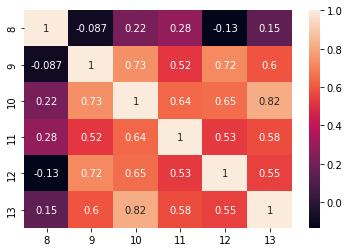

In [15]:
sn.heatmap(X.corr(), annot=True)

Strongly correlate with each other 9 and 10 columns, as well as 10 and 13

In [16]:
X.columns

Index(['8', '9', '10', '11', '12', '13'], dtype='object')

The time shift from 5 to 12 lags is considered, the results are shown in the table for each regressor

In [32]:
corr = pd.DataFrame([sm.tsa.stattools.ccf(X[i], Y, adjusted=False)[5:13] for i in X.columns], columns = [i for i in range(5,13)], index = X.columns).T
corr

,8,9,10,11,12,13
5,0.174039,0.421644,0.508483,0.470396,0.455525,0.606304
6,0.173629,0.423086,0.509206,0.471048,0.455431,0.604882
7,0.173691,0.423726,0.509963,0.471558,0.455213,0.603862
8,0.173479,0.424309,0.510539,0.472203,0.455008,0.603062
9,0.173541,0.424932,0.510801,0.472833,0.454511,0.601329
10,0.173614,0.425697,0.511189,0.473114,0.454102,0.599783
11,0.173363,0.426385,0.511406,0.473148,0.453735,0.598092
12,0.173604,0.426909,0.511770,0.473463,0.453384,0.597402


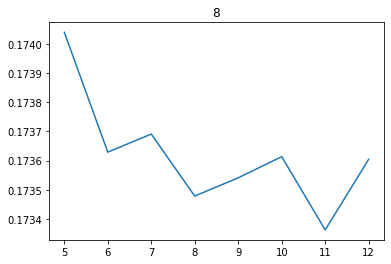

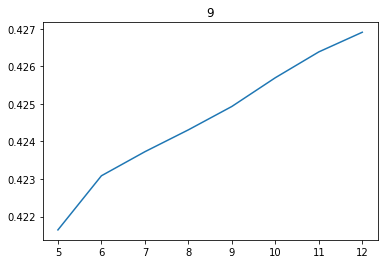

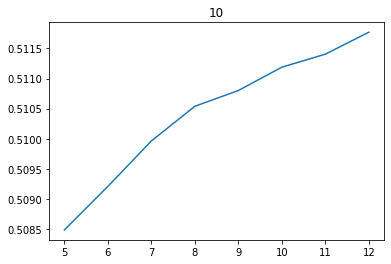

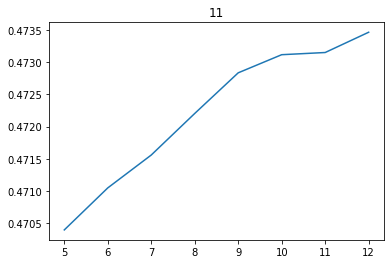

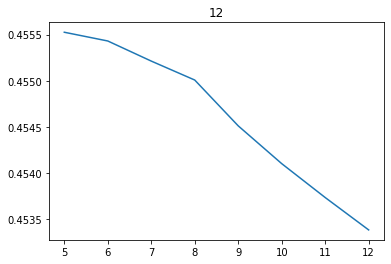

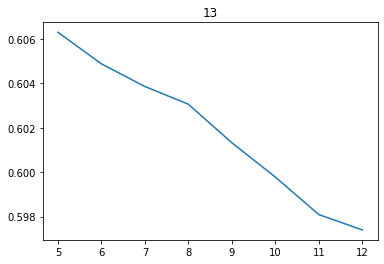

In [33]:
for i in corr:
    corr[i].plot()
    plt.title(i)
    plt.show()





*   The plot for Column 8 drops sharply and shows a discontinuous decrease in correlation.
*   The graphs for columns 9, 10 and 11 shows a rapid increase in correlation with increasing lags.
*   Graphs 12 and 13 columns show a rapid decrease in correlation with increasing lags.



In [35]:
def stat_test(X):
  test = sm.tsa.adfuller(Y)
  print('adf: ', test[0])
  print('p-value: ', test[1])
  print('Critical values: ', test[4])
  if test[0]> test[4]['5%']: 
      print('has unit roots, the series is not stationary')
  else:
      print('there are no unit roots, the series is stationary')

In [38]:
print("dependent series Y")
stat_test(Y)
print()
for i in X.columns:
    print("Regressor X:" + i)
    stat_test(X[i])
    print()

dependent series Y
adf:  -11.824274657455307
p-value:  8.274139990534293e-22
Critical values:  {'1%': -3.430410041262307, '5%': -2.8615665373212145, '10%': -2.566784124883309}
there are no unit roots, the series is stationary

Regressor X:8
adf:  -11.824274657455307
p-value:  8.274139990534293e-22
Critical values:  {'1%': -3.430410041262307, '5%': -2.8615665373212145, '10%': -2.566784124883309}
there are no unit roots, the series is stationary

Regressor X:9
adf:  -11.824274657455307
p-value:  8.274139990534293e-22
Critical values:  {'1%': -3.430410041262307, '5%': -2.8615665373212145, '10%': -2.566784124883309}
there are no unit roots, the series is stationary

Regressor X:10
adf:  -11.824274657455307
p-value:  8.274139990534293e-22
Critical values:  {'1%': -3.430410041262307, '5%': -2.8615665373212145, '10%': -2.566784124883309}
there are no unit roots, the series is stationary

Regressor X:11
adf:  -11.824274657455307
p-value:  8.274139990534293e-22
Critical values:  {'1%': -3.43041

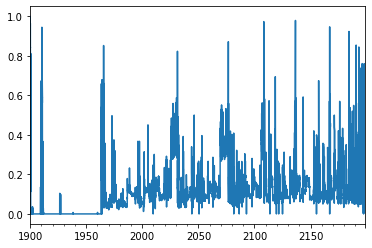

In [39]:
Y.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f57081c07d0>,
      dtype=object)

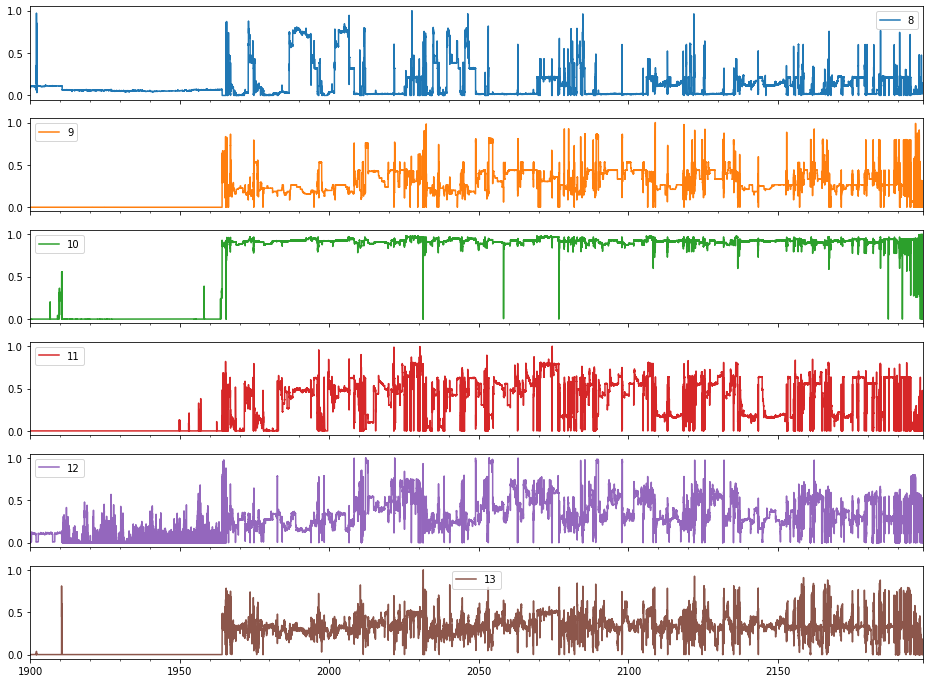

In [40]:
X.plot(subplots=True, figsize=(16, 12))

# Statistical study of series

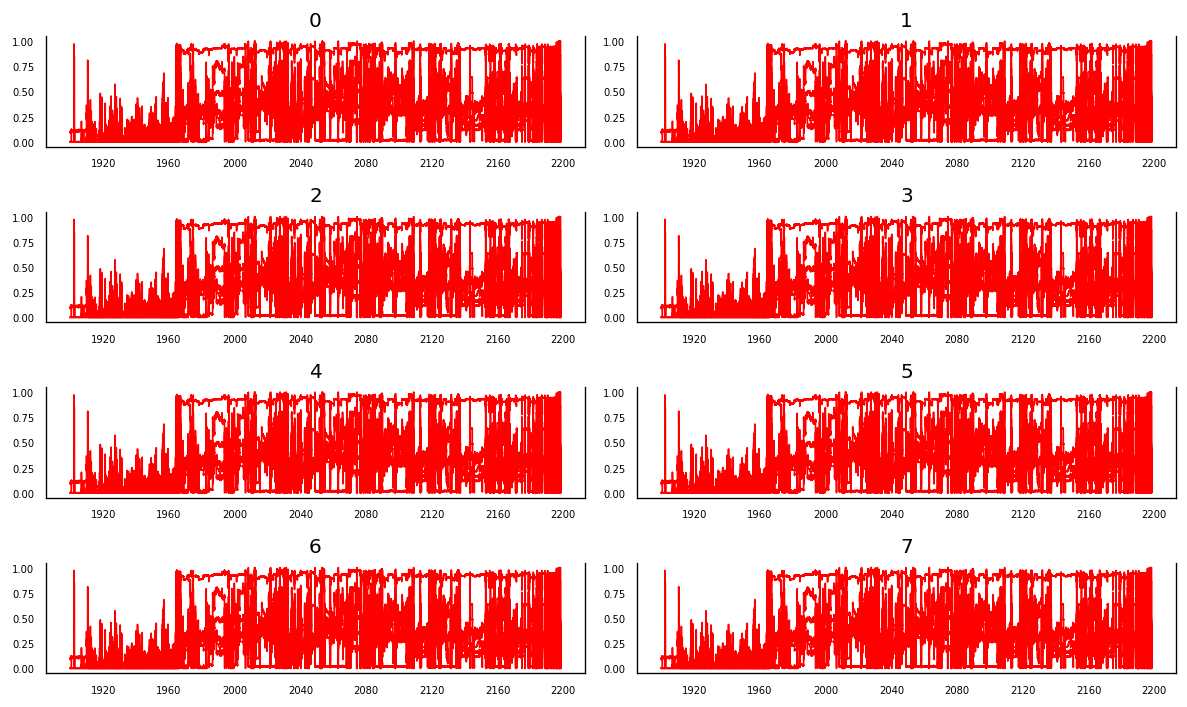

In [53]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = X
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(i)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [55]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(X, variables = X.columns)

,8_x,9_x,10_x,11_x,12_x,13_x
8_y,1.0,0.0,0.0,0.0,0.0,0.0
9_y,0.0,1.0,0.0,0.0,0.0,0.0
10_y,0.0,0.0,1.0,0.0,0.0,0.0
11_y,0.0,0.0,0.0,1.0,0.0,0.0
12_y,0.0,0.0,0.0,0.0,1.0,0.0
13_y,0.0,0.0,0.0,0.0,0.0,1.0


In [56]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [57]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(X)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
8      ::  3622.01   > 83.9383   =>   True
9      ::  2416.5    > 60.0627   =>   True
10     ::  1401.41   > 40.1749   =>   True
11     ::  604.78    > 24.2761   =>   True
12     ::  204.87    > 12.3212   =>   True
13     ::  3.65      > 4.1296    =>   False


In [58]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [59]:
for name, column in X.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "8" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.5901
 No. Lags Chosen       = 69
 Critical value 1%     = -3.43
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "9" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.3279
 No. Lags Chosen       = 69
 Critical value 1%     = -3.43
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "10" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test St

# ARMAX model

In [41]:
model = sm.tsa.ARIMA(Y, order=(2,1,1), exog=X).fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                      4   No. Observations:               108985
Model:                 ARIMA(2, 1, 1)   Log Likelihood              273616.189
Date:                Fri, 24 Jun 2022   AIC                        -547212.377
Time:                        22:08:13   BIC                        -547116.388
Sample:                    01-01-1900   HQIC                       -547183.359
                         - 05-22-2198                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
8              0.0365      0.001     64.717      0.000       0.035       0.038
9             -0.0801      0.000   -200.180      0.000      -0.081      -0.079
10            -0.1941      0.000   -526.471      0.0

# VAR model

In [61]:
model = sm.tsa.VAR(X)
for i in range(9, 15):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 9
AIC :  -43.50958161747244
BIC :  -43.48051437904702
FPE :  1.2706583473912104e-19
HQIC:  -43.50079436334678 

Lag Order = 10
AIC :  -43.52170272308103
BIC :  -43.48946424817925
FPE :  1.255349530929211e-19
HQIC:  -43.51195677529649 

Lag Order = 11
AIC :  -43.52636729926656
BIC :  -43.49095753574994
FPE :  1.2495074935951893e-19
HQIC:  -43.515662641273735 

Lag Order = 12
AIC :  -43.53206941541005
BIC :  -43.493488311138734
FPE :  1.2424029318524564e-19
HQIC:  -43.520406030659075 

Lag Order = 13
AIC :  -43.53707992926924
BIC :  -43.49532743210204
FPE :  1.2361934245443745e-19
HQIC:  -43.52445780120983 

Lag Order = 14
AIC :  -43.540880424008556
BIC :  -43.495956481802914
FPE :  1.2315041947402762e-19
HQIC:  -43.527299536089956 



In [62]:
model_fitted = model.fit(14)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 24, Jun, 2022
Time:                     22:19:35
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -43.4960
Nobs:                     108971.    HQIC:                  -43.5273
Log likelihood:       1.44512e+06    FPE:                1.23150e-19
AIC:                     -43.5409    Det(Omega_mle):     1.22576e-19
--------------------------------------------------------------------
Results for equation 8
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const          0.000290         0.000140            2.068           0.039
L1.8           0.877213         0.003193          274.726           0.000
L1.9          -0.023825         0.002564           -9.292           0.000
L1.10          0.0

# Vec model

In [77]:
from statsmodels.tsa.vector_ar.vecm import *

In [81]:
vec_rank1 = select_coint_rank(X, det_order = 1, k_ar_diff = 1, method = 'trace', signif=0.01)
print(vec_rank1.summary())

Johansen cointegration test using trace test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   6          6624.          117.0
  1   6          4490.          87.77
  2   6          2460.          62.52
  3   6          1157.          41.08
  4   6          433.0          23.15
  5   6          75.99          6.635
-------------------------------------


In [83]:
vec_rank2 = select_coint_rank(X, det_order = 1, k_ar_diff = 1, method = 'maxeig', signif=0.01)
print(vec_rank2.summary())

Johansen cointegration test using maximum eigenvalue test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   1          2134.          49.41
  1   2          2031.          42.86
  2   3          1302.          36.19
  3   4          724.4          29.26
  4   5          357.1          21.75
  5   6          75.99          6.635
-------------------------------------


In [ ]:
vecm = VECM(endog = X, k_ar_diff = 9, coint_rank = 6, deterministic = 'ci')
vecm_fit = vecm.fit()
vecm_fit.predict(steps=10)

RAM is full - crash occurs ... (((